<a href="https://colab.research.google.com/github/jubayer1608015/labtask/blob/main/1608015_labtask01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Course No: ETE 456

Name: Khondokar Jubayer Rahman

ID: 1608015

Lab task_01: Exploring different types of Classification Algorithms

Objective:

Apply various regression algorithms on the real world dataset. Different types of Regression Algorithm:

Linear Regression (Univariate or Multivariate)

Support Vector Regression

Decision Tree Regression


In [46]:
import warnings
warnings.filterwarnings("ignore")

In [47]:
import numpy as np        
import pandas as pd     
import matplotlib.pyplot as plt

In [48]:
!wget -O stroke-data.csv https://www.dropbox.com/s/zgburk3yces5tee/healthcare-dataset-stroke-data.csv?dl=0

--2021-12-21 08:03:31--  https://www.dropbox.com/s/zgburk3yces5tee/healthcare-dataset-stroke-data.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/zgburk3yces5tee/healthcare-dataset-stroke-data.csv [following]
--2021-12-21 08:03:31--  https://www.dropbox.com/s/raw/zgburk3yces5tee/healthcare-dataset-stroke-data.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf2353f9472267bffaf98e2b404.dl.dropboxusercontent.com/cd/0/inline/BcTO1NefmedUynXluAAB7sdqEi92tZOd_s3kcr4lBpsBKnXR_w84AmXo98P1wbY6JGpbMFAZhnTxge-IC-MrIi3R1VkdiKx3qnrxOmnDlmu-cgvAOCNu81VssrTijOdcCRvYxx6O1I_luJ1Nq5BTnwoR/file# [following]
--2021-12-21 08:03:32--  https://ucf2353f9472267bffaf98e2b404.dl.dropboxusercontent.com/cd/0/inline/BcTO1NefmedUynXluAA

In [49]:
"""importing the dataset """

dataset = pd.read_csv('stroke-data.csv')
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [50]:
! pip install klib

In [7]:
import klib

In [51]:
klib.corr_mat(dataset)


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.00,0.00,0.00,-0.00,0.00,0.00,0.01
age,0.00,1.00,0.28,0.26,0.24,0.33,0.25
hypertension,0.00,0.28,1.00,0.11,0.17,0.17,0.13
heart_disease,-0.00,0.26,0.11,1.00,0.16,0.04,0.13
avg_glucose_level,0.00,0.24,0.17,0.16,1.00,0.18,0.13
bmi,0.00,0.33,0.17,0.04,0.18,1.00,0.04
stroke,0.01,0.25,0.13,0.13,0.13,0.04,1.00


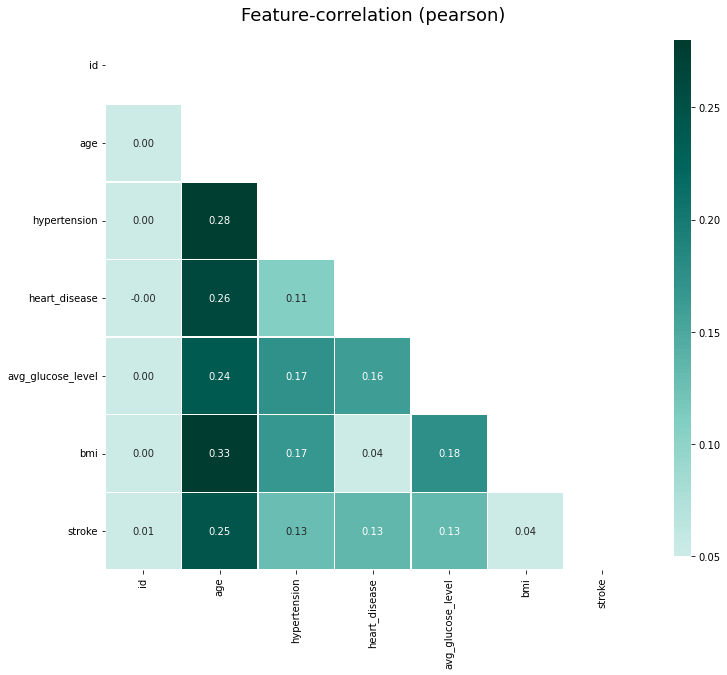

In [52]:
klib.corr_plot(dataset)

In [53]:
features = dataset[['age','hypertension','heart_disease','bmi','Residence_type','avg_glucose_level','smoking_status']]
target = dataset[['stroke']]

In [54]:
features

,age,hypertension,heart_disease,bmi,Residence_type,avg_glucose_level,smoking_status
0,67.0,0,1,36.6,Urban,228.69,formerly smoked
1,61.0,0,0,NaN,Rural,202.21,never smoked
2,80.0,0,1,32.5,Rural,105.92,never smoked
3,49.0,0,0,34.4,Urban,171.23,smokes
4,79.0,1,0,24.0,Rural,174.12,never smoked
...,...,...,...,...,...,...,...
5105,80.0,1,0,NaN,Urban,83.75,never smoked
5106,81.0,0,0,40.0,Urban,125.20,never smoked
5107,35.0,0,0,30.6,Rural,82.99,never smoked
5108,51.0,0,0,25.6,Rural,166.29,formerly smoked


In [55]:
target

,stroke
0,1
1,1
2,1
3,1
4,1
...,...
5105,0
5106,0
5107,0
5108,0


In [56]:
from sklearn.impute import SimpleImputer

In [57]:
imputer = SimpleImputer(missing_values=np.nan,strategy = 'mean')
imputer = imputer.fit(features[['age','hypertension','heart_disease','bmi','avg_glucose_level']])

In [58]:
features[['age','hypertension','heart_disease','bmi','avg_glucose_level']]= imputer.transform(features[['age','hypertension','heart_disease','bmi','avg_glucose_level']])

In [59]:
features

,age,hypertension,heart_disease,bmi,Residence_type,avg_glucose_level,smoking_status
0,67.0,0.0,1.0,36.600000,Urban,228.69,formerly smoked
1,61.0,0.0,0.0,28.893237,Rural,202.21,never smoked
2,80.0,0.0,1.0,32.500000,Rural,105.92,never smoked
3,49.0,0.0,0.0,34.400000,Urban,171.23,smokes
4,79.0,1.0,0.0,24.000000,Rural,174.12,never smoked
...,...,...,...,...,...,...,...
5105,80.0,1.0,0.0,28.893237,Urban,83.75,never smoked
5106,81.0,0.0,0.0,40.000000,Urban,125.20,never smoked
5107,35.0,0.0,0.0,30.600000,Rural,82.99,never smoked
5108,51.0,0.0,0.0,25.600000,Rural,166.29,formerly smoked


In [60]:
imputer = SimpleImputer(missing_values=np.nan,strategy = 'mean')
imputer = imputer.fit(target[['stroke']])

In [61]:
target[['stroke']]= imputer.transform(target[['stroke']])

In [62]:
target

,stroke
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
5105,0.0
5106,0.0
5107,0.0
5108,0.0


In [63]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [64]:
encoder=OneHotEncoder(sparse=False)
encoded_labels = pd.DataFrame (encoder.fit_transform(features[['Residence_type','smoking_status']]))

In [65]:
encoded_labels.columns = encoder.get_feature_names(['Residence_type','smoking_status'])
dataset= pd.concat([features, encoded_labels ], axis=1)

In [66]:
dataset


,age,hypertension,heart_disease,bmi,Residence_type,avg_glucose_level,smoking_status,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0.0,1.0,36.600000,Urban,228.69,formerly smoked,0.0,1.0,0.0,1.0,0.0,0.0
1,61.0,0.0,0.0,28.893237,Rural,202.21,never smoked,1.0,0.0,0.0,0.0,1.0,0.0
2,80.0,0.0,1.0,32.500000,Rural,105.92,never smoked,1.0,0.0,0.0,0.0,1.0,0.0
3,49.0,0.0,0.0,34.400000,Urban,171.23,smokes,0.0,1.0,0.0,0.0,0.0,1.0
4,79.0,1.0,0.0,24.000000,Rural,174.12,never smoked,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1.0,0.0,28.893237,Urban,83.75,never smoked,0.0,1.0,0.0,0.0,1.0,0.0
5106,81.0,0.0,0.0,40.000000,Urban,125.20,never smoked,0.0,1.0,0.0,0.0,1.0,0.0
5107,35.0,0.0,0.0,30.600000,Rural,82.99,never smoked,1.0,0.0,0.0,0.0,1.0,0.0
5108,51.0,0.0,0.0,25.600000,Rural,166.29,formerly smoked,1.0,0.0,0.0,1.0,0.0,0.0


In [67]:
dataset.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'Residence_type',
       'avg_glucose_level', 'smoking_status', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [68]:
new_features = dataset[['age', 'hypertension', 'heart_disease', 'bmi',
       'avg_glucose_level', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes']]

Splitting dataset into train and test set

In [69]:
from sklearn.model_selection import train_test_split

In [72]:
"""Spliting the Dataset into Training Set and Test Set """

X_train,X_test,y_train,y_test=train_test_split(new_features,target,test_size = 0.1,random_state = 43)

In [73]:
print(X_train.shape)
print(X_test.shape)

(4599, 11)
(511, 11)


In [74]:
X_test

,age,hypertension,heart_disease,bmi,avg_glucose_level,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2342,80.0,0.0,0.0,29.7,75.06,0.0,1.0,1.0,0.0,0.0,0.0
2805,16.0,0.0,0.0,24.9,92.77,1.0,0.0,1.0,0.0,0.0,0.0
3986,10.0,0.0,0.0,17.3,95.80,1.0,0.0,1.0,0.0,0.0,0.0
4740,60.0,0.0,0.0,36.8,234.45,1.0,0.0,0.0,1.0,0.0,0.0
3129,13.0,0.0,0.0,20.3,75.85,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2411,14.0,0.0,0.0,48.8,79.36,0.0,1.0,0.0,0.0,1.0,0.0
1634,77.0,0.0,0.0,24.1,71.44,0.0,1.0,0.0,0.0,0.0,1.0
3190,52.0,0.0,0.0,22.4,106.54,0.0,1.0,0.0,0.0,1.0,0.0
1222,10.0,0.0,0.0,14.6,93.11,1.0,0.0,1.0,0.0,0.0,0.0


Different types of Classification Algorithm

Logistic Regression

K Nearest Neighbor (KNN)

Decision Tree Classifier

Random Forest Classifier

Naive Bayes

Support Vector Machine (SVM)

In [75]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()


lr.fit(X_train,y_train)

LogisticRegression()

In [76]:
y_pred = lr.predict(X_test)

In [32]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,precision_score,recall_score

In [77]:
confusion_matrix(y_test,y_pred)

array([[492,   0],
       [ 18,   1]])

In [78]:
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

              precision    recall  f1-score   support

          No       0.96      1.00      0.98       492
         Yes       1.00      0.05      0.10        19

    accuracy                           0.96       511
   macro avg       0.98      0.53      0.54       511
weighted avg       0.97      0.96      0.95       511



In [79]:
from sklearn.neighbors import KNeighborsClassifier

# Classifier Model
classifier = KNeighborsClassifier(n_neighbors=8, metric = 'minkowski', p=6)
classifier.fit(X_train,y_train)
# Prediction
y_pred = classifier.predict(X_test)

In [80]:
#making confusion matrices
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

[[491   1]
 [ 19   0]]
              precision    recall  f1-score   support

          No       0.96      1.00      0.98       492
         Yes       0.00      0.00      0.00        19

    accuracy                           0.96       511
   macro avg       0.48      0.50      0.49       511
weighted avg       0.93      0.96      0.94       511



In [81]:
from sklearn.svm import SVC

# Classifier Model
classifier = SVC(kernel = 'linear', random_state = 73)
classifier.fit(X_train,y_train)
# Prediction
y_pred = classifier.predict(X_test)

In [82]:
#making confusion matrices
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

[[492   0]
 [ 19   0]]
              precision    recall  f1-score   support

          No       0.96      1.00      0.98       492
         Yes       0.00      0.00      0.00        19

    accuracy                           0.96       511
   macro avg       0.48      0.50      0.49       511
weighted avg       0.93      0.96      0.94       511



In [83]:
from sklearn.tree import DecisionTreeClassifier
# Classifier Model
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 73)
classifier.fit(X_train,y_train)
# Prediction
y_pred = classifier.predict(X_test)

In [84]:
#making confusion matrices
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

[[465  27]
 [ 16   3]]
              precision    recall  f1-score   support

          No       0.97      0.95      0.96       492
         Yes       0.10      0.16      0.12        19

    accuracy                           0.92       511
   macro avg       0.53      0.55      0.54       511
weighted avg       0.93      0.92      0.92       511



In [86]:
from sklearn.ensemble import RandomForestClassifier
# Classifier Model
classifier = RandomForestClassifier(n_estimators=11, criterion ='entropy', random_state = 73)
classifier.fit(X_train,y_train)
# Prediction
y_pred = classifier.predict(X_test)

In [87]:
#making confusion matrices
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

[[484   8]
 [ 17   2]]
              precision    recall  f1-score   support

          No       0.97      0.98      0.97       492
         Yes       0.20      0.11      0.14        19

    accuracy                           0.95       511
   macro avg       0.58      0.54      0.56       511
weighted avg       0.94      0.95      0.94       511



In this experiment four types of clssification model are used. As a dataset stroke dataset are used which includes different types of data related to the stroke probability.this experiment deals with the missing data from the dataset and also one hot encoding is used to covert the string data to boolean binary data.Spliting dataset are used as train and test dataset.Then train and test dataset are used in different types of claassification algorithm.